In [1]:
%run imports.ipynb

In [29]:
import gseapy as gp
from pybiomart import Dataset

In [4]:
lpmd = pd.read_csv('source_data/context_specific_lpmd.csv')

lpmd = lpmd[lpmd.context == 'bivalent_domain']

In [8]:
def read_rsem_result(f, sample=None):
    tmp = pd.read_csv(f, sep='\t')
    
    tmp['gene_id'] = tmp.gene_id.str.split('.', expand=True)[0]
    
    tmp = tmp.groupby('gene_id').agg({'TPM': 'mean'}).reset_index()
    if sample:
        tmp['sample'] = sample
    
    return tmp

results = glob.glob('/data3/project/SNUH_DNMT3A/pipelines/LI2016-RNASEQ-STAR-RSEM/result/03_rsem/*.genes.results')
rsem_results = [read_rsem_result(f, os.path.basename(f).split('.')[0]) for f in tqdm(results)]

data = pd.concat(rsem_results).pivot(index='gene_id', columns=['sample'], values='TPM')

100%|██████████| 140/140 [01:09<00:00,  2.01it/s]


In [11]:
data.shape

(60527, 140)

In [57]:
li2016_calls = pd.read_csv('source_data/li2016_variant_calls.csv')
sample2status = {r.name:r.status for r in li2016_calls.to_records()}
run2status = {r.run_rrbs:r.status for r in li2016_calls.to_records()}

li2016_calls = li2016_calls.merge(lpmd.drop('status', axis=1), left_on='run_rrbs', right_on='run')
li2016_calls = li2016_calls[li2016_calls.run_rnaseq.notnull()]

li2016_calls.shape

(38, 21)

<AxesSubplot:xlabel='status', ylabel='lpmd'>

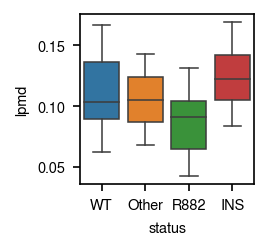

In [58]:
fig = plt.figure(figsize=(1.5, 1.5))
ax = fig.add_subplot(111)

sns.boxplot(data=li2016_calls, x='status', y='lpmd')

In [59]:
lpmd_groups = []
for r in li2016_calls.to_records():
    if r.lpmd > li2016_calls.lpmd.quantile(0.75):
        lpmd_groups.append('q4')
    elif r.lpmd > li2016_calls.lpmd.quantile(0.5):
        lpmd_groups.append('q3')
    elif r.lpmd > li2016_calls.lpmd.quantile(0.25):
        lpmd_groups.append('q2')
    else:
        lpmd_groups.append('q1')
        
li2016_calls['lpmd_group'] = lpmd_groups

In [63]:
q4_lpmd_runs = li2016_calls[li2016_calls.lpmd_group == 'q4'].run_rnaseq.tolist()
q3_lpmd_runs = li2016_calls[li2016_calls.lpmd_group == 'q3'].run_rnaseq.tolist()
q2_lpmd_runs = li2016_calls[li2016_calls.lpmd_group == 'q2'].run_rnaseq.tolist()
q1_lpmd_runs = li2016_calls[li2016_calls.lpmd_group == 'q1'].run_rnaseq.tolist()

len(q1_lpmd_runs), len(q2_lpmd_runs), len(q3_lpmd_runs), len(q4_lpmd_runs)

(10, 9, 9, 10)

In [64]:
data

sample,SRR15674421,SRR15674422,SRR15674423,SRR15674424,SRR15674425,SRR15674426,SRR15674427,SRR15674428,SRR15674429,SRR15674430,SRR15674431,SRR15674432,SRR15674433,SRR15674434,SRR15674435,SRR15674436,SRR15674437,SRR15674438,SRR15674439,SRR15674440,SRR15674441,SRR15674442,SRR15674443,SRR15674444,SRR15674445,SRR15674446,SRR15674447,SRR15674448,SRR15674449,SRR15674450,SRR15674451,SRR15674452,SRR15674453,SRR15674454,SRR15674455,SRR15674456,SRR15674457,SRR15674458,SRR15674459,SRR15674460,SRR15674461,SRR15674462,SRR15674463,SRR15674464,SRR15674465,SRR15674466,SRR15674467,SRR15674468,SRR15674469,SRR15674470,SRR15674471,SRR15674472,SRR15674473,SRR15674474,SRR15674475,SRR15674476,SRR15674477,SRR15674478,SRR15674479,SRR15674480,SRR15674481,SRR15674482,SRR15674483,SRR15674484,SRR15674485,SRR15674486,SRR15674487,SRR15674488,SRR15674489,SRR15674490,SRR15674491,SRR15674492,SRR15674493,SRR15674494,SRR15674495,SRR15674496,SRR15674497,SRR15674498,SRR15674499,SRR15674500,SRR15674501,SRR15674502,SRR15674503,SRR15674504,SRR15674505,SRR15674506,SRR15674507,SRR15674508,SRR15674509,SRR15674510,SRR15674511,SRR15674512,SRR15674513,SRR15674514,SRR15674515,SRR15674516,SRR15674517,SRR15674518,SRR15674519,SRR15674520,SRR15674521,SRR15674522,SRR3088034,SRR3088036,SRR3088058,SRR3088060,SRR3088086,SRR3088088,SRR3088096,SRR3088098,SRR3088130,SRR3088132,SRR3088136,SRR3088138,SRR3088154,SRR3088156,SRR3088166,SRR3088168,SRR3088324,SRR3088328,SRR3088346,SRR3088348,SRR3088350,SRR3088354,SRR3088357,SRR3088361,SRR3088391,SRR3088395,SRR3088398,SRR3088400,SRR3088423,SRR3088427,SRR3088430,SRR3088432,SRR3088444,SRR3088448,SRR3088564,SRR3088568,SRR3088584,SRR3088588
gene_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,0.11,0.15,0.03,0.08,0.20,0.09,0.21,0.13,0.35,0.32,0.10,0.20,0.03,0.04,0.17,0.39,0.09,0.06,0.01,0.04,3.84,5.40,0.01,0.12,0.01,0.04,0.01,0.04,0.03,0.07,0.06,0.58,0.06,0.13,0.34,0.47,0.45,0.29,0.12,0.18,0.11,0.42,0.18,0.00,0.00,0.00,0.30,0.12,1.93,4.60,0.73,0.24,0.02,0.01,0.02,0.10,1.44,0.60,0.34,2.05,0.00,0.19,1.14,1.56,0.00,0.21,0.10,0.00,0.02,0.28,0.15,0.01,0.86,0.07,0.69,0.33,0.33,0.56,0.21,4.49,0.15,1.25,0.18,0.34,0.09,0.11,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,1.39,2.30,2.19,1.11,1.25,0.88,1.12,0.77,0.08,0.00,0.03,0.09,0.14,0.61,0.05,0.03,1.23,0.01,0.15,0.12,0.12,0.13,0.08,0.22,0.51,0.65,0.72,2.47,0.30,0.14,0.59,0.16,0.28,4.57,0.01,4.42,0.10,1.30,0.08,0.20,0.00,0.13,0.45,1.78,0.47,0.21
ENSG00000000005,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.04,0.03,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.03,0.00,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00
ENSG00000000419,17.54,3.68,23.86,32.98,30.37,21.21,21.30,23.13,17.25,22.11,20.96,13.63,25.07,28.27,14.09,17.85,21.00,36.02,14.77,10.57,56.07,40.66,13.18,26.30,25.58,27.02,16.62,15.96,23.88,23.27,18.89,22.80,35.37,18.35,30.09,33.80,34.19,31.94,10.85,43.04,44.53,35.41,19.64,29.74,29.64,35.00,23.32,17.42,31.87,32.98,28.00,28.55,32.77,36.22,32.30,31.91,30.16,32.92,29.37,44.90,26.23,33.86,31.39,31.80,14.69,13.01,14.08,46.49,28.91,28.65,34.61,32.77,27.59,10.46,13.14,8.15,12.76,13.10,26.23,25.84,23.99,23.47,26.37,27.29,22.10,33.94,29.65,28.71,26.57,29.67,24.30,29.10,21.33,35.08,37.51,37.65,40.64,39.48,39.05,42.83,38.98,42.64,16.22,45.47,17.51,33.91,16.05,26.20,16.31,23.78,26.26,18.55,26.56,30.33,38.17,38.78,24.02,20.19,36.57,29.13,24.15,30.57,17.74,24.52,20.47,23.35,2

In [65]:
dataset = Dataset(name='hsapiens_gene_ensembl', host='http://www.ensembl.org')
res = dataset.query(attributes=['ensembl_gene_id', 'external_gene_name', 'gene_biotype'])

ensg2symbol = {r['Gene stable ID']:r['Gene name'] for r in res[res['Gene type'] == 'protein_coding'].to_records()}

data_ = data.copy()
data_ = data_.loc[[ind for ind in data_.index.values if ind in ensg2symbol]]
data_.index = [ensg2symbol[ensg] for ensg in data_.index.values]

In [66]:
q4_cv = data_[q4_lpmd_runs].std(axis=1) / data_[q4_lpmd_runs].mean(axis=1)
q3_cv = data_[q3_lpmd_runs].std(axis=1) / data_[q3_lpmd_runs].mean(axis=1)
q2_cv = data_[q2_lpmd_runs].std(axis=1) / data_[q2_lpmd_runs].mean(axis=1)
q1_cv = data_[q1_lpmd_runs].std(axis=1) / data_[q1_lpmd_runs].mean(axis=1)

### Bivalent domain을 promoter에 가지는 유전자

In [274]:
total_genes = set(q4_cv.index.dropna().tolist())
len(total_genes)

19356

In [275]:
with open('../note2/results/INSTABILITY-EXP-VARIANCE/bivalent_marked_genes.list') as inFile:
    bivalent_marked_genes = [l.strip() for l in inFile.readlines()]
    
print(len(bivalent_marked_genes))
    
bivalent_marked_genes = set(bivalent_marked_genes) & total_genes
len(bivalent_marked_genes)

4075


4069

In [276]:
q4_variable_genes = q4_cv.sort_values().dropna().index.dropna().tolist()[-4000:]
# genes = data_.index[(np.log2((data_[q4_lpmd_runs].mean(axis=1) + 1) / (data_[q2_lpmd_runs].mean(axis=1) + 1)) > 1)].tolist()
len(q4_variable_genes)

4000

In [277]:
gene_annotation = defaultdict(list)
gene_annotation['gene'] = list(total_genes)

gene_annotation = pd.DataFrame(gene_annotation)

gene_annotation['has_bivalent_promoter'] = gene_annotation.gene.isin(bivalent_marked_genes)
gene_annotation['is_variable_in_q4'] = gene_annotation.gene.isin(q4_variable_genes)

In [278]:
pd.crosstab(gene_annotation.has_bivalent_promoter, gene_annotation.is_variable_in_q4).iloc[[1, 0], [1, 0]]

is_variable_in_q4,True,False
has_bivalent_promoter,,
True,1786,2283
False,2214,13073


In [279]:
from scipy.stats import fisher_exact

fisher_exact(pd.crosstab(gene_annotation.has_bivalent_promoter, gene_annotation.is_variable_in_q4))

(4.619268296639748, 0.0)

### GO Biological process

In [217]:
res = gp.enrichr(q4_variable_genes, 'GO_Biological_Process_2021').res2d

3000

In [225]:
res

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,cell-cell adhesion via plasma-membrane adhesio...,86/170,4.354534e-19,2.195992e-15,0,0,4.163248,1.760134e+02,ROBO2;TENM2;PTPRS;TENM3;TENM4;CDH9;CLDN1;MYPN;...
1,GO_Biological_Process_2021,adenylate cyclase-activating G protein-coupled...,58/118,1.175621e-12,2.964329e-09,0,0,3.908845,1.073729e+02,GLP1R;ADRA1D;PTH1R;ADRA1B;RXFP1;MC4R;UCN3;UCN2...
2,GO_Biological_Process_2021,anterograde trans-synaptic signaling (GO:0098916),96/244,2.256411e-12,3.793027e-09,0,0,2.633806,7.063142e+01,CHRM2;GABRB2;CHRM3;SNAP25;GABRB1;OR10J5;CPNE6;...
3,GO_Biological_Process_2021,nervous system development (GO:0007399),151/447,3.560611e-12,4.075166e-09,0,0,2.081362,5.486697e+01,SEMA5A;CHRM2;CNTFR;CHRM3;SH3GL3;MYT1L;CPNE6;MS...
4,GO_Biological_Process_2021,adenylate cyclase-modulating G protein-coupled...,72/165,4.040418e-12,4.075166e-09,0,0,3.135208,8.225115e+01,CHRM2;GLP1R;VIPR2;ADRA1D;PTH1R;ADRA1B;RXFP1;MC...
...,...,...,...,...,...,...,...,...,...,...
5038,GO_Biological_Process_2021,"retrograde transport, endosome to Golgi (GO:00...",1/88,9.999962e-01,9.999963e-01,0,0,0.045738,1.742384e-07,DENND2A
5039,GO_Biological_Process_2021,recombinational repair (GO:0000725),1/79,9.999963e-01,9.999963e-01,0,0,0.051045,1.882477e-07,MEIOB
5040,GO_Biological_Process_2021,regulation of cellular response to heat (GO:19...,1/79,9.999963e-01,9.999963e-01,0,0,0.051045,1.882477e-07,CAMK2D
5041,GO_Biological_Process_2021,"DNA-templated transcription, termination (GO:0...",1/70,9.999963e-01,9.999963e-01,0,0,0.057735,2.120248e-07,CAVIN1


In [194]:
res[res.Term.str.contains('hema')].head(20)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
71,KEGG_2021_Human,Systemic lupus erythematosus,25/135,0.152067,0.639949,0,0,1.290298,2.430191,C1QB;C1QA;CD80;H2AB1;H2AC15;C2;H2AC14;C9;H2BU1...


In [226]:
res.to_csv('source_data/li2016_top4000variable_gobp.csv', index=False)

In [236]:
gobp_annotated = pd.read_csv('source_data/li2016_top4000variable_gobp.annotated.csv')

terms = [
    'Cell-cell adhesion',
    'Angiogenesis',
    'Cell proliferation & survival',
    'Cell migration',
    'Cell differentiation',
    'Cell communication',
    'Signaling',
    'ECM organization',
]

gobp_annotated['Group'] = pd.Categorical(gobp_annotated.Group, categories=terms)
gobp_annotated = gobp_annotated[gobp_annotated.Group.notnull()].sort_values(['Group', 'Adjusted P-value'])

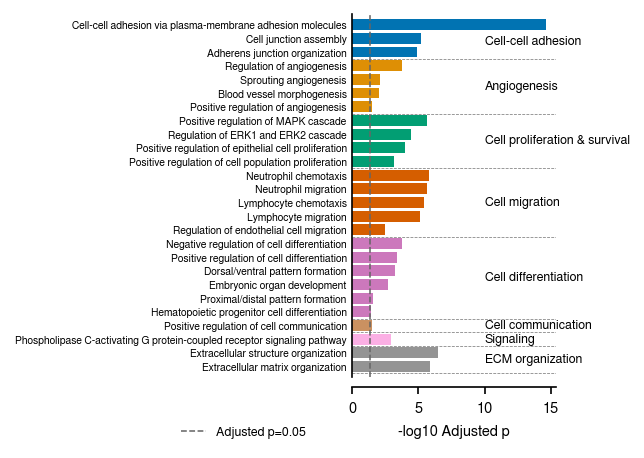

In [248]:
def process_term(term):
    return term[0].upper() + term[1:].split('(')[0]
    
palette = sns.color_palette('colorblind', 8)

group2color = {t:palette[i] for i, t in enumerate(terms)}

fig = plt.figure(figsize=(1.75, 3.2))
ax = fig.add_subplot(111)

for i, r, in enumerate(gobp_annotated.to_records()):
    ax.barh(i, -np.log10(r['Adjusted P-value']), fc=group2color[r.Group])
    
hline_positions = np.cumsum(gobp_annotated.Group.value_counts().sort_index().values) - 0.5
for position in hline_positions:
    ax.axhline(position, ls='--', lw=0.375, c='0.5')

tmp = np.hstack([[0], hline_positions])
term_positions = (tmp[:-1] + tmp[1:]) / 2
for term, position in zip(terms, term_positions):
    ax.text(10, position, term, va='center', ha='left', fontsize=6)
    
ax.set_yticks(range(len(gobp_annotated)))
ax.set_yticklabels(gobp_annotated.Term.map(process_term), fontsize=5)
ax.tick_params(length=0, axis='y', pad=1.5)
ax.set_ylim([-0.75, len(gobp_annotated) - 0.25])
ax.invert_yaxis()

for d in ['top', 'right']:
    ax.spines[d].set_visible(False)
ax.spines['bottom'].set_position(('outward',5))

ax.set_xlabel('-log10 Adjusted p')
    
ax.axvline(-np.log10(0.05), ls='--', c='0.4', label='Adjusted p=0.05')
ax.legend(frameon=False, bbox_to_anchor=(-0.9, -0.2), loc='lower left', fontsize=6)

save_figures('source_data_figures/transcriptome_analysis/li2016_top4000variable_gobp')

# plt.savefig('results/INSTABILITY-EXP-VARIANCE/li2016_top3000variable_gobp.pdf', dpi=300, bbox_inches='tight')

## GOCC

In [249]:
gocc = gp.enrichr(q4_variable_genes, 'GO_Cellular_Component_2021').res2d
len(genes)

3000

In [250]:
gocc.to_csv('source_data/li2016_top4000variable_gocc.csv', index=False)

In [259]:
gocc = pd.read_csv('source_data/li2016_top4000variable_gocc.annotated.csv')
gocc = gocc[gocc.Selected.fillna(False)]

In [260]:
gocc

,Gene_set,Selected,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Cellular_Component_2021,True,integral component of plasma membrane (GO:0005...,528/1454,2.190000e-51,8.620000e-49,0,0,2.475550,288.763365,CNTFR;SLC4A1;SLCO6A1;HTR4;SLC4A3;CLDN1;RXFP1;S...
1,GO_Cellular_Component_2021,True,collagen-containing extracellular matrix (GO:0...,169/380,9.590000e-28,1.880000e-25,0,0,3.301009,205.360295,VIT;FCN2;ADAMDEC1;PRSS1;SPON1;TPSB2;FCN3;SERPI...
3,GO_Cellular_Component_2021,True,cell-cell junction (GO:0005911),91/271,9.220000e-08,9.060000e-06,0,0,2.046019,33.144507,BMPR2;CTNND2;ITGB3;LDB3;PTPRK;CLDN1;CDH9;CDH7;...
5,GO_Cellular_Component_2021,True,potassium channel complex (GO:0034705),35/80,1.180000e-06,6.770000e-05,0,0,3.129746,42.717792,DPP10;KCNE1;LRRC38;KCNC3;KCNA1;GRIK3;KCNA3;GRI...
7,GO_Cellular_Component_2021,True,exocytic vesicle (GO:0070382),17/30,1.030000e-05,5.052780e-04,0,0,5.248827,60.281563,SYT5;SYT4;SYT3;SYT1;RAB3IL1;IGF1;SYT9;SYTL5;SY...
9,GO_Cellular_Component_2021,True,adherens junction (GO:0005912),47/132,2.060000e-05,8.104230e-04,0,0,2.226172,24.018569,SPTBN4;BMPR2;CTNND2;LIN7A;LDB3;CDH9;DLL1;CDH7;...
10,GO_Cellular_Component_2021,True,secretory vesicle (GO:0099503),16/29,2.960000e-05,1.056588e-03,0,0,4.938832,51.505230,SYT5;SYT4;SYT3;SYT1;IGF1;SYT9;SYTL5;SYT8;SYTL3...
13,GO_Cellular_Component_2021,True,anchored component of plasma membrane (GO:0046...,21/46,7.440000e-05,1.975403e-03,0,0,3.372455,32.059555,NTNG1;RTBDN;PRMT8;TREH;TEX101;NOD2;THY1;RGMB;R...
24,GO_Cellular_Component_2021,True,clathrin-coated endocytic vesicle membrane (GO...,26/69,5.096290e-04,8.011362e-03,0,0,2.427886,18.407814,CHRM2;TYRP1;CD3G;AREG;CD3D;EGFR;APOE;APOB;HLA-...
34,GO_Cellular_Component_2021,True,tight junction (GO:0070160),28/85,3.402063e-03,3.820031e-02,0,0,1.971714,11.205988,PATJ;FRMPD2;CLDN1;CLDN22;CDH5;GJA1;POF1B;CLDN2...


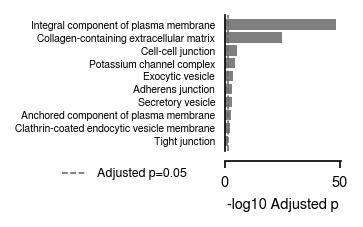

In [273]:
def process_term(term):
    return term[0].upper() + term[1:].split('(')[0]
    
palette = sns.color_palette('colorblind', 8)

group2color = {t:palette[i] for i, t in enumerate(terms)}

fig = plt.figure(figsize=(1, 1.2))
ax = fig.add_subplot(111)

for i, r, in enumerate(gocc.to_records()):
#     if 'membrane' in r.Term:
#         ax.barh(i, -np.log10(r['Adjusted P-value']), fc='C3')
#     else:
    ax.barh(i, -np.log10(r['Adjusted P-value']), fc='0.5')
    
# hline_positions = np.cumsum(gobp_annotated.group.value_counts().sort_index().values) - 0.5
# for position in hline_positions:
#     ax.axhline(position, ls='--', lw=0.375, c='0.2')

# tmp = np.hstack([[0], hline_positions])
# term_positions = (tmp[:-1] + tmp[1:]) / 2
# for term, position in zip(terms, term_positions):
#     ax.text(2.5, position, term, va='center', ha='left', fontsize=6)
    
ax.set_yticks(range(len(gocc)))
ax.set_yticklabels(gocc.Term.map(process_term), fontsize=5)
ax.tick_params(length=0, axis='y')
ax.set_ylim([-0.75, len(gocc) - 0.25])
ax.invert_yaxis()

for d in ['top', 'right']:
    ax.spines[d].set_visible(False)
ax.spines['bottom'].set_position(('outward',5))

ax.set_xlabel('-log10 Adjusted p')
    
ax.axvline(-np.log10(0.05), ls='--', c='0.4', label='Adjusted p=0.05')
ax.legend(frameon=False, bbox_to_anchor=(-1.5, -0.3), loc='lower left', fontsize=6)

save_figures('source_data_figures/transcriptome_analysis/li2016_top4000variable_gocc')

# plt.savefig('results/INSTABILITY-EXP-VARIANCE/li2016_top3000variable_gocc.pdf', dpi=300, bbox_inches='tight')

## GOMF

In [267]:
gomf = gp.enrichr(q4_variable_genes, 'GO_Molecular_Function_2021').res2d
len(genes)

3000

In [268]:
gomf.to_csv('source_data/li2016_top4000variable_gomf.csv', index=False)

In [271]:
gomf = pd.read_csv('source_data/li2016_top4000variable_gomf.annotated.csv')
gomf = gomf[gomf.Selected.fillna(False)]

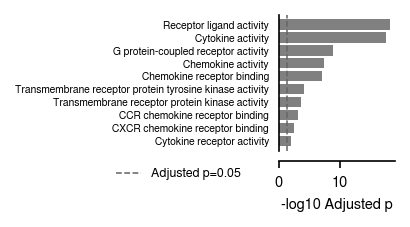

In [272]:
def process_term(term):
    return term[0].upper() + term[1:].split('(')[0]
    
palette = sns.color_palette('colorblind', 8)

# group2color = {t:palette[i] for i, t in enumerate(terms)}

keywords = [
    'transmembrane receptor protein tyrosine kinase activity',
    'cytokine activity',
    'protein tyrosine kinase activity',
    'mitogen-activated protein kinase kinase binding',
    'chemokine activity',
    'spectrin binding',
]

fig = plt.figure(figsize=(1, 1.2))
ax = fig.add_subplot(111)

for i, r, in enumerate(gomf.to_records()):
    ax.barh(i, -np.log10(r['Adjusted P-value']), fc='0.5')
#         ax.barh(i, -np.log10(r['Adjusted P-value']), fc='C3')
#     else:
    
    
# hline_positions = np.cumsum(gobp_annotated.group.value_counts().sort_index().values) - 0.5
# for position in hline_positions:
#     ax.axhline(position, ls='--', lw=0.375, c='0.2')

# tmp = np.hstack([[0], hline_positions])
# term_positions = (tmp[:-1] + tmp[1:]) / 2
# for term, position in zip(terms, term_positions):
#     ax.text(2.5, position, term, va='center', ha='left', fontsize=6)
    
ax.set_yticks(range(len(gomf)))
ax.set_yticklabels(gomf.Term.map(process_term), fontsize=5)
ax.tick_params(length=0, axis='y')
ax.set_ylim([-0.75, len(gomf) - 0.25])
ax.invert_yaxis()

for d in ['top', 'right']:
    ax.spines[d].set_visible(False)
ax.spines['bottom'].set_position(('outward',5))

ax.set_xlabel('-log10 Adjusted p')
    
ax.axvline(-np.log10(0.05), ls='--', c='0.4', label='Adjusted p=0.05')
ax.legend(frameon=False, bbox_to_anchor=(-1.5, -0.3), loc='lower left', fontsize=6)

save_figures('source_data_figures/transcriptome_analysis/li2016_top4000variable_gomf')

## Expressions

Q4    10
Q1    10
Q3     9
Q2     9
Name: group, dtype: int64


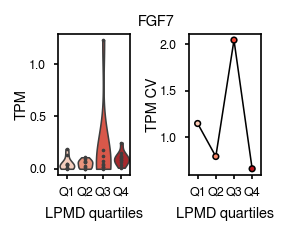

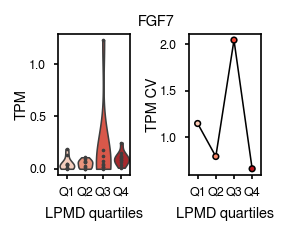

In [290]:
def plot_expression_and_variance(g):
    fig = plt.figure(figsize=(1.75, 1.25))

    ax = fig.add_subplot(1, 2, 1)
    d = defaultdict(list)
    for runs, group in zip([q1_lpmd_runs, q2_lpmd_runs, q3_lpmd_runs, q4_lpmd_runs], ['Q1', 'Q2', 'Q3', 'Q4']):
        s = data_[runs].loc[g]
        d['sample'].extend(s.index.tolist())
        d['expression'].extend(s.tolist())
        d['group'].extend([group] * len(s))
    d = pd.DataFrame(d)

    # ax.plot(d.cv, marker='.')

    sns.violinplot(data=d, x='group', y='expression', cut=0, scale='width', inner='point', palette=sns.color_palette('Reds', 4))
    ax.set_xlabel('LPMD quartiles')
    ax.set_ylabel('TPM', labelpad=0.1)
    ax.tick_params(length=2, labelsize=6)
    ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
    print(d.group.value_counts())

    ax = fig.add_subplot(1, 2, 2)

    d = defaultdict(list)
    for runs, group in zip([q1_lpmd_runs, q2_lpmd_runs, q3_lpmd_runs, q4_lpmd_runs], ['Q1', 'Q2', 'Q3', 'Q4']):
        s = data_[runs].loc[g]
        d['group'].append(group)
        d['cv'].append(s.std() / s.mean())
        d['std'].append(s.std())
        d['mean'].append(s.mean())
    d = pd.DataFrame(d)

    ax.set_xlabel('LPMD quartiles')
    ax.set_ylabel('TPM CV', labelpad=0.1)
    
    ax.plot(d.cv, c='k', zorder=-1)
    ax.scatter(range(4), d.cv, marker='.', s=30, lw=0.75, ec='k', c=sns.color_palette('Reds', 4))
    ax.tick_params(length=2, labelsize=6)
    ax.set_xlim([-0.5, 3.5])
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'], fontsize=6)

    fig.subplots_adjust(wspace=0.8)
    
    fig.suptitle(g, fontsize=7)
    
    return fig
    
plot_expression_and_variance('FGF7')

Q4    10
Q1    10
Q3     9
Q2     9
Name: group, dtype: int64
Q4    10
Q1    10
Q3     9
Q2     9
Name: group, dtype: int64
Q4    10
Q1    10
Q3     9
Q2     9
Name: group, dtype: int64
Q4    10
Q1    10
Q3     9
Q2     9
Name: group, dtype: int64
Q4    10
Q1    10
Q3     9
Q2     9
Name: group, dtype: int64
Q4    10
Q1    10
Q3     9
Q2     9
Name: group, dtype: int64
Q4    10
Q1    10
Q3     9
Q2     9
Name: group, dtype: int64
Q4    10
Q1    10
Q3     9
Q2     9
Name: group, dtype: int64
Q4    10
Q1    10
Q3     9
Q2     9
Name: group, dtype: int64


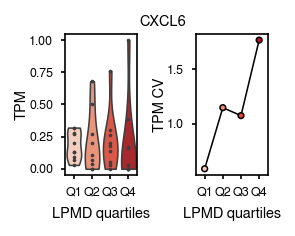

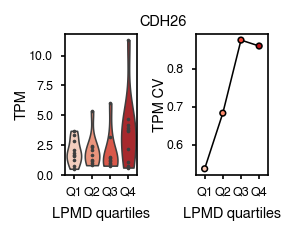

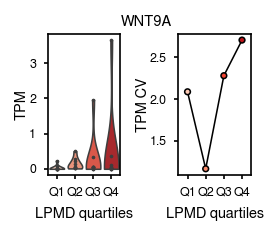

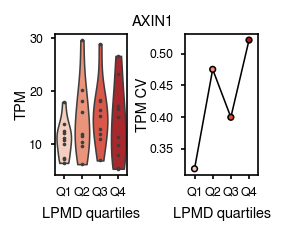

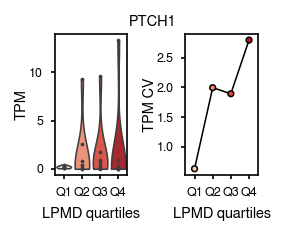

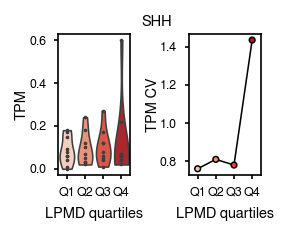

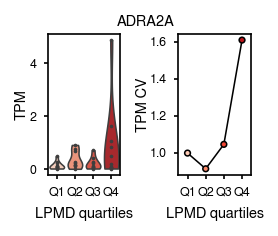

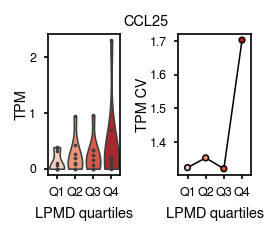

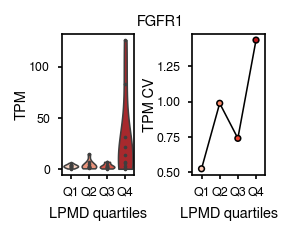

In [291]:
target_genes = ['CXCL6', 'CDH26', 'WNT9A', 'AXIN1' ,'PTCH1', 'SHH', 'ADRA2A', 'CCL25', 'FGFR1']

for g in target_genes:
    fig = plot_expression_and_variance(g)
    
    save_figures(f'source_data_figures/transcriptome_analysis/expression_variance_{g}')